### Pregunta de Negoci - Analistes del Perfil del Client:

> Quins són els perfils demogràfics que mostren més propensió a
contractar productes financers?
>

### Llibreries i càrrega de dades

In [180]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

In [181]:
pip install plottable


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [182]:
df = pd.read_csv("../Data/df.csv")

Paleta de colors

In [183]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

In [184]:

# Variables 
contactados   = df.nunique().id                                     # Número total de clientes contactados
suscribieron  = df[df['deposit'] == True].nunique().id             # Número de clientes que suscribieron 
duracion_llam = df[df['deposit'] == True].duration.sum()           # Duración de llamadas a suscriptores
llam_telf = df[df['contact'] == 'telephone']['campaign'].sum()      # Número de llamadas realizadas por teléfono
llam_cell = df[df['contact'] == 'cellular']['campaign'].sum()       # Número de llamadas realizadas por movil
llam = df['campaign'].sum()                                         # Número total de llamadas
contatos_previos_sus = df[df['deposit'] == True]['previous'].sum() # Número de contactos previos a suscriptores
suscribieron_por_mes = df[df['deposit'] == True].groupby('month').count()['deposit']  # Suscriptores en el mes
contactos_por_mes = df.groupby('month').count()['deposit']          # clientes contactados en el mes      
conversion_por_mes = suscribieron_por_mes / contactos_por_mes       # conversión por mes


# Prints
print("El número total de clientes contactados es:",contactados)
print("El número de suscriptores es:",suscribieron)
print("La duración total de las llamadas a suscriptores es:",duracion_llam)
print("El número de llamadas realizadas a teléfono fijo es: ", llam_telf)
print("El número de llamadas realizadas a móvil es: ", llam_cell)
print("El número total de llamadas realizadas es: ", llam)
print("El número total de contactos previos de los suscriptores es:", contatos_previos_sus)
print("La conversión por mes es: ", conversion_por_mes)

El número total de clientes contactados es: 11141
El número de suscriptores es: 5281
La duración total de las llamadas a suscriptores es: 2839340
El número de llamadas realizadas a teléfono fijo es:  2297
El número de llamadas realizadas a móvil es:  19221
El número total de llamadas realizadas es:  27957
El número total de contactos previos de los suscriptores es: 6185
La conversión por mes es:  month
Apr    0.624729
Aug    0.453166
Dec    0.908257
Feb    0.568475
Jan    0.412791
Jul    0.414844
Jun    0.447908
Mar    0.898182
May    0.327782
Nov    0.427205
Oct    0.823980
Sep    0.842767
Name: deposit, dtype: float64


In [185]:
#KPIs
kpi1 = suscribieron/contactados          # porcentaje de conversión a depósito
kpi2 = duracion_llam/suscribieron        # promedio de duración de llamadas a suscriptores
kpi3_tel = llam_telf/llam                # porcentaje de llamadas a teléfono
kpi3_cell = llam_cell/llam               # porcentaje de llamadas a móvil
kpi3 = (llam_telf+llam_cell)/llam        # porcentaje de llamadas a teléfono o móvil
kpi4 = contatos_previos_sus/suscribieron # promedio de contactos previos a suscriptores
kpi5 = conversion_por_mes.idxmax()       # mes con mayor tasa de conversión
kpi5_tasa = conversion_por_mes.max()     # tasa de conversión del mes con mayor tasa de conversión




# Prints
print("KPI 1: El porcentaje de conversión a depósito es ",kpi1*100,"%")
print("KPI 2: La duración media de las llamadas a suscriptoreses",kpi2)
print("KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es ",kpi3*100,"%")
print("KPI 4: El porcentaje de contactos previos a suscriptores es ",kpi4)
print("KPI 5: El mes amb millor conversió ha sigut", kpi5, "amb una taxa de conversió de", kpi5_tasa)

KPI 1: El porcentaje de conversión a depósito es  47.40148999192173 %
KPI 2: La duración media de las llamadas a suscriptoreses 537.6519598560878
KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es  76.96820116607648 %
KPI 4: El porcentaje de contactos previos a suscriptores es  1.1711797008142397
KPI 5: El mes amb millor conversió ha sigut Dec amb una taxa de conversió de 0.908256880733945


### Extracte del EDA - Característiques personals

##### Age - deposit

<Axes: xlabel='deposit', ylabel='age'>

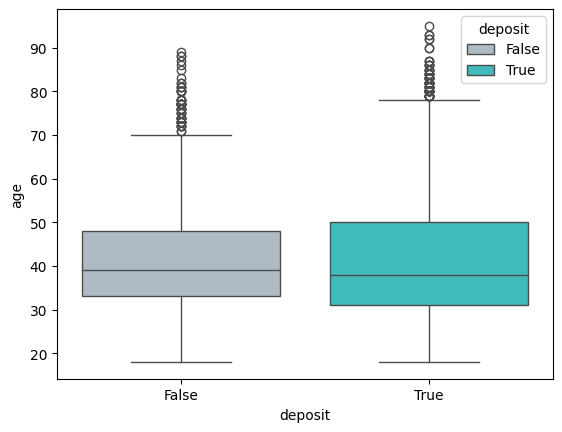

In [186]:
sns.boxplot(data=df, x='deposit', y='age', hue='deposit')


##### Job - deposit

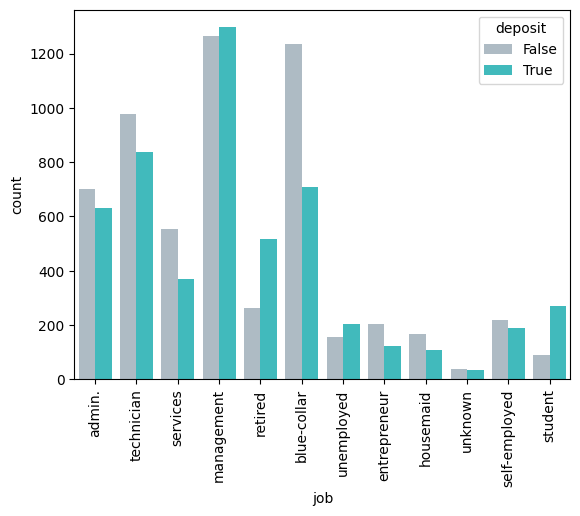

In [187]:
sns.countplot(data=df, x='job', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Els que més: Estudiants i retired, però hi ha pocs estudiants i avis, management seria el següent. 

Nota sobre açò - Després, els perfils admin i technician, malgrat la menos proporció, hi ha molta gent auxí que compensa trucar-los.

##### Marital - deposit

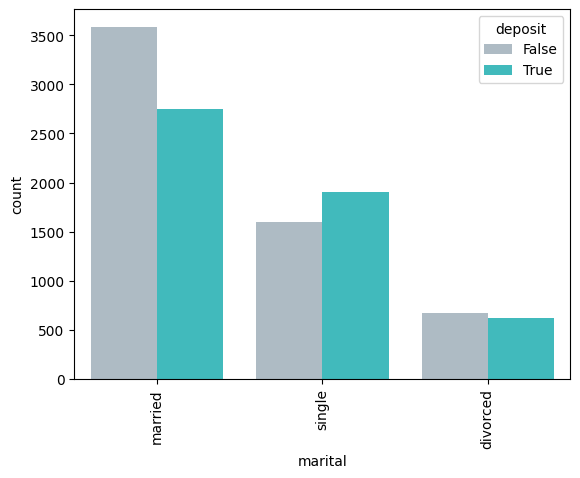

In [188]:
sns.countplot(data=df, x='marital', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Més els que estan solters que els casats.

##### Education - deposit

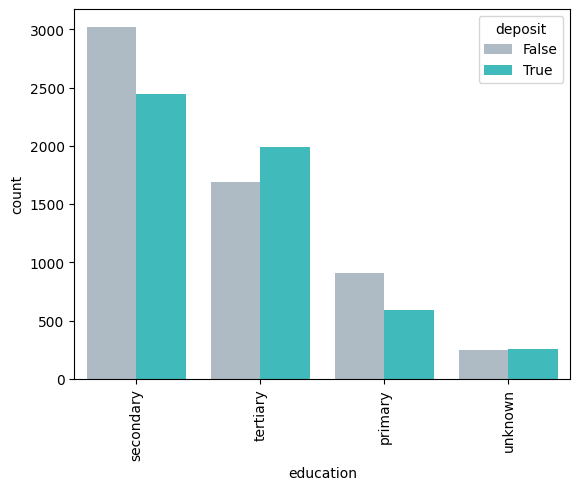

In [189]:
sns.countplot(data=df, x='education', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Tertiary, estudis superiors

### Anàlisi Roser

Aplicarem la kpi1 (porcentaje de conversión a depósito) a diferents perfils.

Sabem per a EDA que la major conversió correspon a **estudiants** o **jubilats**, persones **solteres** que no han de consultar un prèstec amb un altre i persones amb **estudis superiors**. Però qui tindrà més conversió, els estudiants solters o els jubilats amb estudis superiors?




In [190]:
# Perfil demogràfic: Estudiants solters
estudiants_solters = df[(df['job'] == 'student') & (df['marital'] == 'single')]
total_es = estudiants_solters.nunique().id
suscribieron_es = estudiants_solters[estudiants_solters['deposit'] == True].nunique().id
kpi1_es = suscribieron_es / total_es if total_es != 0 else 0

# Perfil demogràfic: Jubilats amb estudis superiors
jubilats_superiors = df[(df['job'] == 'retired') & (df['education'] == 'tertiary')]
total_js = jubilats_superiors.nunique().id
suscribieron_js = jubilats_superiors[jubilats_superiors['deposit'] == True].nunique().id
kpi1_js = suscribieron_js / total_js if total_js != 0 else 0

# Print results
print(f"Taxa de conversió dels estudiants solters: {kpi1_es:.2%}")
print(f"Taxa de conversió dels jubilats amb estudis superiors: {kpi1_js:.2%})")

Taxa de conversió dels estudiants solters: 75.15%
Taxa de conversió dels jubilats amb estudis superiors: 72.14%)


Ara volem veure amb més detall les combinacions possibles d'aquestes variables i quins perfils són els que converteixen més

In [191]:

# Agrupem el dataframe per la combinació de les característiques demogràfiques 
df_agrupat_pc = df.groupby(['job', 'marital', 'education'])


# Creem una taula per al càlcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversió de cada grup
for (feina, estat_civil, educacio), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'educació': educacio,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio
    })

# Convertim la taula de conversió en un dataframe 
df_conversio_pc = pd.DataFrame(taula_conversio_pc)

# Ordenem el dataframe per la taxa de conversió de major a menor
resultats_ordenats = df_conversio_pc.sort_values(by='taxa_conversio', ascending=False)

# Arrodonim la taxa de conversió a 3 decimals
resultats_ordenats['taxa_conversio'] = resultats_ordenats['taxa_conversio'].round(3)

# Reiniciem l'index
resultats_ordenats = resultats_ordenats.reset_index()
resultats_ordenats = resultats_ordenats.drop(columns=['index'])

# Mostrem els millors perfils
print(resultats_ordenats.head(8))

          feina estat_civil   educació  contactats  contractats  \
0  entrepreneur    divorced    unknown           2            2   
1    management      single    primary           1            1   
2       student     married    unknown           2            2   
3    unemployed    divorced    unknown           1            1   
4       student      single  secondary         181          145   
5    unemployed    divorced   tertiary           5            4   
6       student      single    primary          19           15   
7       retired    divorced   tertiary          35           27   

   taxa_conversio  
0           1.000  
1           1.000  
2           1.000  
3           1.000  
4           0.801  
5           0.800  
6           0.789  
7           0.771  


Finalment, mirem de més a prop els jubilats amb estudis superiors

In [192]:
# Mirem més a fons els jubilats amb estudis superiors
estudiants_conversio_df = resultats_ordenats['feina'] == 'retired'

print(resultats_ordenats[estudiants_conversio_df].head(25))

       feina estat_civil   educació  contactats  contractats  taxa_conversio
7    retired    divorced   tertiary          35           27           0.771
11   retired      single   tertiary           8            6           0.750
12   retired    divorced  secondary          59           43           0.729
15   retired     married    unknown          39           28           0.718
18   retired    divorced    primary          68           48           0.706
19   retired     married   tertiary          97           68           0.701
28   retired     married  secondary         245          158           0.645
29   retired     married    primary         200          128           0.640
43   retired      single  secondary           9            5           0.556
120  retired    divorced    unknown           8            2           0.250
122  retired      single    primary           9            2           0.222


TypeError: Table.__init__() got an unexpected keyword argument 'image_dict'

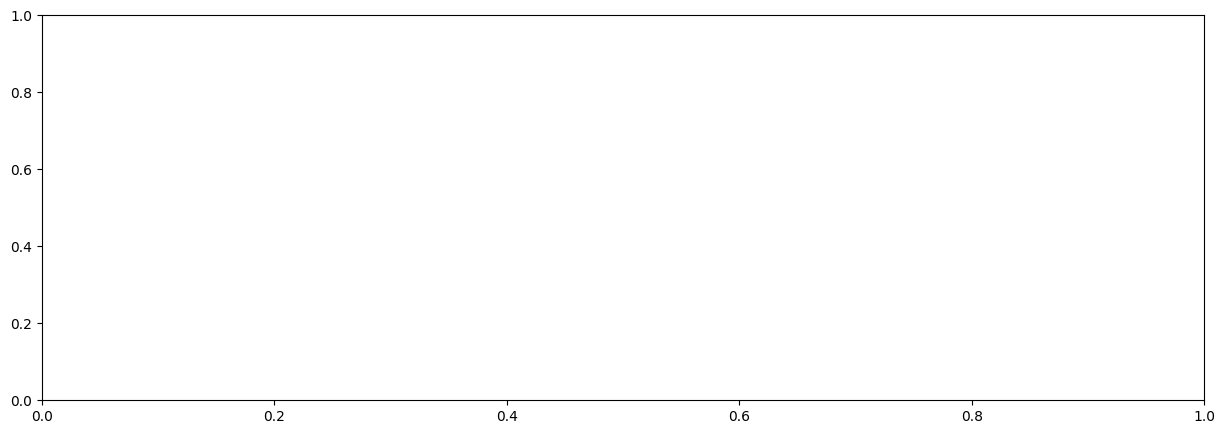

In [193]:
from plottable import Table

# Fer còpia del top 8 i seleccionar columnes
top8_resultats_ordenats = resultats_ordenats.head(8).copy()
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educació', 'taxa_conversio', 'contactats', 'contractats'
]]

# Diccionari d’imatges per a cada estat civil
imatges_estat_civil = {
    'single': 'single.png',
    'married': 'married.png',
    'divorced': 'divorced.png'
}

# Crear nova columna amb rutes d’imatges
top8_resultats_ordenats['estat_civil_icona'] = top8_resultats_ordenats['estat_civil'].map(imatges_estat_civil)

# Eliminar la columna textual si no la vols mostrar
top8_resultats_ordenats = top8_resultats_ordenats.drop(columns='estat_civil')

# Reordenar columnes si cal
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil_icona', 'educació', 'taxa_conversio', 'contactats', 'contractats'
]]

# Transposar per visualització
top8_resultats_ordenats = top8_resultats_ordenats.transpose()

# Mostrar taula amb imatges
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_resultats_ordenats,
    image_dict={'estat_civil_icona': top8_resultats_ordenats.loc['estat_civil_icona']}
)
plt.show()


In [194]:
pip install -U plottable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [196]:
import plottable
print(plottable.__version__)

0.1.5


In [1]:
pip3 install --upgrade pip

SyntaxError: invalid syntax (3705398690.py, line 1)